<h2>Tools</h2>

In [156]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

<h2>Dataset</h2>

In [157]:
data = pd.read_csv("NB_for_example.csv")
data.head()

,x1,x2,Y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0


<Axes: >

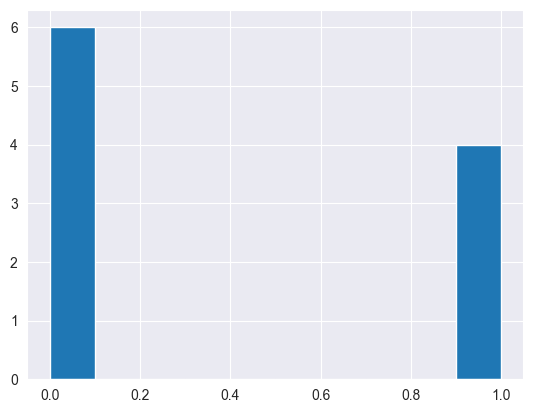

In [158]:
data["Y"].hist()

<Axes: >

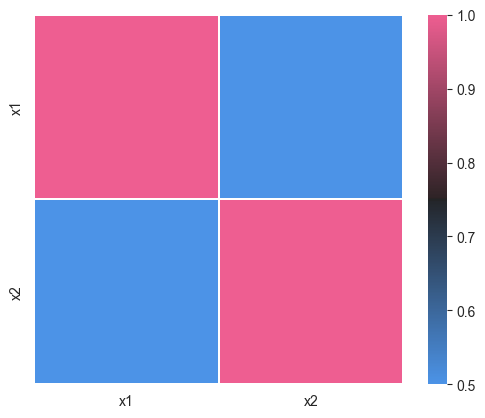

In [159]:
corr = data.iloc[:, :-1].corr(method="pearson")

cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=.5, cmap=cmap, square=True, linewidths=.2)

![Alt text](image-13.png)

<h3>prior</h3>

In [160]:
#df -> dataframe
#Y -> target variable
def calculate_prior(df, Y):
    classes = sorted(list( df[Y].unique() )) #Y e [0,1]<--classes
    prior = []
    for clas in classes: # in [0,1]
        prior.append( len( df[ df[Y]==clas ] ) / len(df) )
    return prior

In [161]:
sorted(list(data['Y'].unique()))

[0, 1]

In [162]:
calculate_prior(data, 'Y')

[0.6, 0.4]

<h3>likelihood</h3>

In [163]:
#df -> dataframe: data
#feat_name -> feature name: "X1" or "X2"
#feat_val -> feature value: 0, 1 or 2
#Y -> target variable: 'Y'
#label -> class label: 0 or 1

def calculate_naive_likelihood(df, feat_name, feat_val, Y, label):
    #print('df\n', df)
    df = df[ df[Y]==label ]
    #print('df:\n',df)
    numerator = len( df[ df[feat_name]==feat_val ] )
    #print('numerator', numerator)
    denominator = len(df)
    #print('denominator', denominator)
    #print('num/den', numerator / denominator)
    return numerator / denominator

In [164]:
calculate_naive_likelihood(data, "x1", 0, "Y", 0)

0.16666666666666666

In [165]:
def naive_bayes(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1] #columns except Y --> ex. [x1, x2]

    # calculate prior
    prior = calculate_prior(df, Y) #P(Y)

    Y_pred = []
    
    # loop over every data sample
    for x in X:
        # calculate likelihood
        classes = sorted(list(df[Y].unique())) #ex. Y e [0,1]<--classes
        likelihood = [1]*len(classes) 
        for j in range(len(classes)): #ex. j e Y[0,1]
            for i in range(len(features)): #ex. i e X[x1,x2]
                likelihood[j] *= calculate_naive_likelihood(df, features[i], x[i], Y, classes[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(classes)
        for j in range(len(classes)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [166]:
X = [[0, 2]]  #  estimated value of Y given that X = (0, 2)
predictions = naive_bayes(data, X, "Y")

predictions


array([1], dtype=int64)